# Spotify

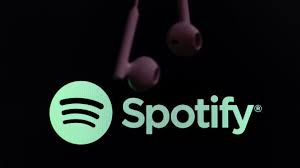

Spotify is one of the popular platforms where you can listen your favourite songs , podcasts and playlists . Being a spotify lover myself, today i am gonna do some analysis on its songs :) Hope ya all like it :)

## This file is based on previous file so the concept is same but in this file i have used a widget system to select a particular song from the songs with same name with the help of artists :)

# Importing The Packages

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import plotly
from sklearn.preprocessing import StandardScaler
from scipy.spatial import distance
import copy
from IPython.display import display
import warnings
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
warnings.filterwarnings("ignore")
plotly.offline.init_notebook_mode (connected = True)

# Importing The Data

In [2]:
data=pd.read_csv('../data/spotify/data.csv')

# First Look At The Data

In [3]:
data.head()

valence  year  acousticness  \
0   0.0594  1921         0.982   
1   0.9630  1921         0.732   
2   0.0394  1921         0.961   
3   0.1650  1921         0.967   
4   0.2530  1921         0.957   

                                             artists  danceability  \
0  ['Sergei Rachmaninoff', 'James Levine', 'Berli...         0.279   
1                                     ['Dennis Day']         0.819   
2  ['KHP Kridhamardawa Karaton Ngayogyakarta Hadi...         0.328   
3                                   ['Frank Parker']         0.275   
4                                     ['Phil Regan']         0.418   

   duration_ms  energy  explicit                      id  instrumentalness  \
0       831667   0.211         0  4BJqT0PrAfrxzMOxytFOIz          0.878000   
1       180533   0.341         0  7xPhfUan2yNtyFG0cUWkt8          0.000000   
2       500062   0.166         0  1o6I8BglA6ylDMrIELygv1          0.913000   
3       210000   0.309         0  3ftBPsC5vPBKxYSee08FDH          0.000028   
4       166693   0.193         0  4d6HGyGT8e121BsdKmw9v6          0.000002   

   key  liveness  loudness  mode  \
0   10     0.665   -20.096     1   
1    7     0.160   -12.441     1   
2    3     0.101   -14.850     1   
3    5     0.381    -9.316     1   
4    3     0.229   -10.096     1   

                                                name  popularity release_date  \
0  Piano Concerto No. 3 in D Minor, Op. 30: III. ...           4         1921   
1                            Clancy Lowered the Boom           5         1921   
2                                          Gati Bali           5         1921   
3                                          Danny Boy           3         1921   
4                        When Irish Eyes Are Smiling           2         1921   

   speechiness    tempo  
0       0.0366   80.954  
1       0.4150   60.936  
2       0.0339  110.339  
3       0.0354  100.109  
4       0.0380  101.665

# Removing the unnecessary data

In [4]:
data.drop(columns=['id','release_date'],inplace=True)

# Standardize the data

In [5]:
x=data[data.drop(columns=['artists','name']).columns].values
scaler =StandardScaler().fit(x)
X_scaled = scaler.transform(x)
data[data.drop(columns=['artists','name']).columns]=X_scaled

In [6]:
data.sort_values('tempo',inplace=True)

# Function To Find The Relevant Song :)

In [7]:
def find_word(word,df,number=10):
    df.drop_duplicates(inplace=True)
    words=df['name'].values
    artists=df['artists'].values
    t=[]
    count=0
    if word[-1]==' ':
        word=word[:-1]
    for i in words:
        if word.lower() in i.lower():
            t.append([len(word)/len(i),count])
        else:
            t.append([0,count])
        count+=1
    t.sort(reverse=True)
    s=[[words[t[i][1]],artists[t[i][1]].strip('][').split(', ')] for i in range(number)]   
    songs=[words[t[i][1]] for i in range(number)]
    artist=[artists[t[i][1]] for i in range(number)]
    x=[]
    for i in s:
        l=''
        by=''
        for j in i[1]:
            by+=j
        l+=i[0]+' by '+by
        x.append(l)
    tup=[]
    for i in range(number):
        tup.append((x[i],i))

    
    return tup,songs,artist
    


# Recommendation System Using Cosine Similarity 

In [8]:
def make_matrix_cosine(df,best,number,artist):
    df.drop_duplicates(inplace=True)
    x=df[(df['name']==best) & (df['artists']==artist)].drop(columns=['name','artists']).values
    artist=artist.replace("'","").replace("'","").replace('[','').replace(']','')
    if ',' in artist:
        inm = artist.rfind(",")
        artist=artist[:inm]+' and'+artist[inm+1:]
    print('The song closest to your search is :',best,' by ',artist)
    

    song_names=df['name'].values
#    df=df.fillna(df.mean())
    p=[]
    count=0
    for i in df.drop(columns=['artists','name']).values:
        p.append([distance.cosine(x,i),count])
        count+=1
    p.sort()
    for i in range(1,number+1):
        artists=data['artists'].values
        artist=artists[p[i][1]]
        artist=artist.replace("'","").replace("'","").replace('[','').replace(']','')
        if ',' in artist:
            inm = artist.rfind(",")
            artist=artist[:inm]+' and'+artist[inm+1:]
        print(song_names[p[i][1]],'by',artist)
    

In [9]:
a=input('Please enter The name of the song :')
b=int(input('Please enter the number of recommendations you want: '))
tup,s,ar=find_word(a,data)
ans=widgets.Dropdown(
    options=tup,
    description='Closest Songs To '+a,
    disabled=False,
)
display(ans)

Please enter The name of the song :poppy
Please enter the number of recommendations you want: 4


Dropdown(description='Closest Songs To poppy', options=(("Poppy by 'Mac Miller'", 0), ("Poppy Day by 'Lord Kit…

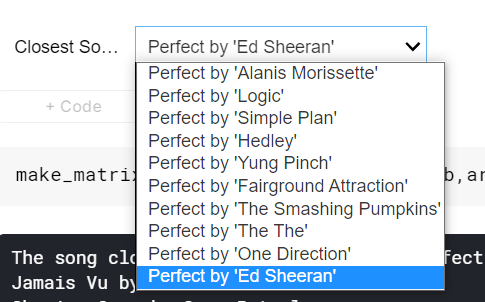

In [10]:
make_matrix_cosine(data,s[ans.value],b,ar[ans.value])

The song closest to your search is : Poppy  by  Mac Miller
Wonderland by Caravan Palace
Give It Up to Me by Sean Paul
Juicy by The Notorious B.I.G.
Waiting On The Rain by J Boog


# Function To Calculate Euclidean Distance And Make A Matrix

In [11]:
def make_matrix(df,best,number,artist):
    df.drop_duplicates(subset=['artists','name'],inplace=True)
    x=df[(df['name']==best) & (df['artists']==artist)].drop(columns=['name','artists']).values
    artist=artist.replace("'","").replace("'","").replace('[','').replace(']','')
    if ',' in artist:
        inm = artist.rfind(",")
        artist=artist[:inm]+' and'+artist[inm+1:]
    print('The song closest to your search is :',best,' by ',artist)
    

    song_names=df['name'].values
#    df=df.fillna(df.mean())
    p=[]
    count=0
    for i in df.drop(columns=['artists','name']).values:
        p.append([distance.euclidean(x,i),count])
        count+=1
    p.sort()
    for i in range(1,number+1):
        artists=data['artists'].values
        artist=artists[p[i][1]]
        artist=artist.replace("'","").replace("'","").replace('[','').replace(']','')
        if ',' in artist:
            inm = artist.rfind(",")
            artist=artist[:inm]+' and'+artist[inm+1:]
        print(song_names[p[i][1]],'by',artist)
    

In [12]:
a=input('Please enter The name of the song :')
b=int(input('Please enter the number of recommendations you want: '))
tup,s,ar=find_word(a,data)
ans=widgets.Dropdown(
    options=tup,
    description='Closest Songs To '+a,
    disabled=False,
)
display(ans)

Please enter The name of the song :poppy
Please enter the number of recommendations you want: 4


Dropdown(description='Closest Songs To poppy', options=(("Poppy by 'Mac Miller'", 0), ("Poppy Day by 'Lord Kit…

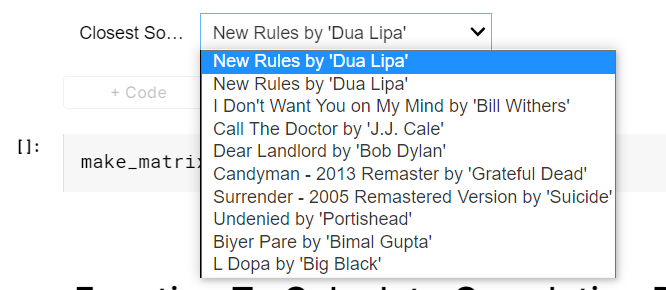

In [13]:
make_matrix(data,s[ans.value],b,ar[ans.value])

The song closest to your search is : Poppy  by  Mac Miller
Wonderland by Caravan Palace
Waiting On The Rain by J Boog
Cae la Noche by Luny Tunes, Noriega and Hector & Tito
Give It Up to Me by Sean Paul


# Function To Calculate Correlation Distance And Make A Matrix

In [14]:
def make_matrix_correlation(df,best,number,artist):
    df.drop_duplicates(subset=['artists','name'],inplace=True)
    x=df[(df['name']==best) & (df['artists']==artist)].drop(columns=['name','artists']).values
    artist=artist.replace("'","").replace("'","").replace('[','').replace(']','')
    if ',' in artist:
        inm = artist.rfind(",")
        artist=artist[:inm]+' and'+artist[inm+1:]
    print('The song closest to your search is :',best,' by ',artist)
    

    song_names=df['name'].values
#    df=df.fillna(df.mean())
    p=[]
    count=0
    for i in df.drop(columns=['artists','name']).values:
        p.append([distance.correlation(x,i),count])
        count+=1
    p.sort()
    for i in range(1,number+1):
        artists=data['artists'].values
        artist=artists[p[i][1]]
        artist=artist.replace("'","").replace("'","").replace('[','').replace(']','')
        if ',' in artist:
            inm = artist.rfind(",")
            artist=artist[:inm]+' and'+artist[inm+1:]
        print(song_names[p[i][1]],'by',artist)
    

In [15]:
a=input('Please enter The name of the song :')
b=int(input('Please enter the number of recommendations you want: '))
tup,s,ar=find_word(a,data)
ans=widgets.Dropdown(
    options=tup,
    description='Closest Songs To '+a,
    disabled=False,
)
display(ans)

Please enter The name of the song :poppy
Please enter the number of recommendations you want: 5


Dropdown(description='Closest Songs To poppy', options=(("Poppy by 'Mac Miller'", 0), ("Poppy Day by 'Lord Kit…

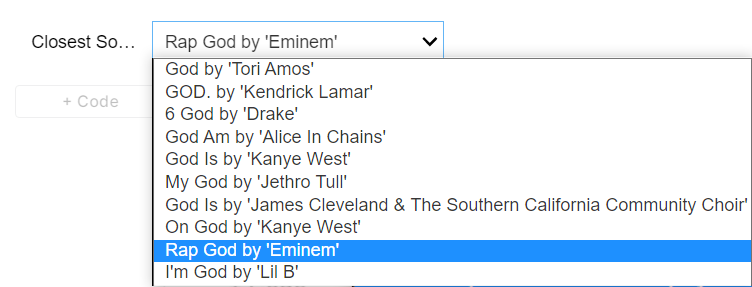

In [17]:
print(ans)
print(ans.value)
make_matrix_correlation(data,s[ans.value],b,ar[ans.value])

Dropdown(description='Closest Songs To poppy', options=(("Poppy by 'Mac Miller'", 0), ("Poppy Day by 'Lord Kitchener''The Executor'", 1), ("Amapola (Pretty Little Poppy) by 'Benny Goodman'", 2), ("The Red Poppy: Russian Sailor's Dance by 'Reinhold Moritzewitsch Glière''Eugene Ormandy''Philadelphia Orchestra'", 3), ('Poppy Girls - From "The Wiz" Soundtrack by \'Quincy Jones\'', 4), ("Poppy Nogood and the Phantom Band - Instrumental by 'Terry Riley'", 5), ("I Don't Want You on My Mind by 'Bill Withers'", 6), ("Call The Doctor by 'J.J. Cale'", 7), ("Dear Landlord by 'Bob Dylan'", 8), ("Candyman - 2013 Remaster by 'Grateful Dead'", 9)), value=0)
0
The song closest to your search is : Poppy  by  Mac Miller
Wonderland by Caravan Palace
Juicy by The Notorious B.I.G.
Give It Up to Me by Sean Paul
Waiting On The Rain by J Boog
When You're Mad by Ne-Yo


# Guys the widgets will work on edit mode :(  I have still put the ss to show a glimpse of the widget :)

# Hope you liked the file :)

# Thank you :)

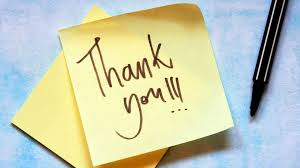